# Introduction to Hierarchical Clustering

**Hierarchical clustering** is an unsupervised machine learning algorithm that organizes data into a hierarchy of clusters based on similarity, without needing a predefined number of clusters. Key points:

- Builds a **dendrogram**, a tree-like structure, to visualize cluster relationships.
- Uses **agglomerative** (merging small clusters) or **divisive** (splitting large clusters) approaches.
- Relies on **distance metrics** (e.g., Euclidean) and **linkage criteria** (e.g., Ward’s method) to group data.
- Ideal for tasks like **social media analysis** and **market segmentation**.

#What Is Hierarchical Clustering and How Do We Visualize It?

##Step 1: Setting Up Your Environment

In [ ]:
# Import necessary libraries for hierarchical clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

##Step 2: Loading and Exploring the Dataset

In [ ]:
# Load the customer dataset
!curl -L -o ./customer-segmentation-tutorial-in-python.zip\
  https://www.kaggle.com/api/v1/datasets/download/vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip -o ./customer-segmentation-tutorial-in-python.zip
data = pd.read_csv('Mall_Customers.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nData Summary:")
print(data.describe())

# Prepare features by dropping the CustomerID column
features = data.drop('CustomerID', axis=1)

# Handle categorical variable 'Gender' with one-hot encoding
features_encoded = pd.get_dummies(features, columns=['Gender'], drop_first=True)

# Extract only numerical features for scaling
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
features_for_scaling = features_encoded[numerical_features]

# Standardize the numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(features_for_scaling)

# Create DataFrame with scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Combine with encoded categorical features
gender_encoded = features_encoded.drop(numerical_features, axis=1)
final_features = pd.concat([scaled_numerical_df, gender_encoded], axis=1)

# Convert to numpy array for clustering
scaled_features = final_features.values

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1583  100  1583    0     0   1794      0 --:--:-- --:--:-- --:--:--  1794
Archive:  ./customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      
Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000      

##Step 3: Implementing Hierarchical Clustering

In [ ]:
# Compute the linkage matrix using Ward's method
# Ward minimizes the variance within clusters
linkage_matrix = linkage(scaled_features, method='ward')

print("Linkage Matrix Shape:", linkage_matrix.shape)
print("First few rows of linkage matrix:", linkage_matrix[:5])

Linkage Matrix Shape: (199, 4)
First few rows of linkage matrix: [[6.50000000e+01 6.80000000e+01 7.17666897e-02 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 7.17666897e-02 2.00000000e+00]
 [3.00000000e+00 5.00000000e+00 9.00803899e-02 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 1.05730374e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 1.20910138e-01 2.00000000e+00]]


##Step 4: Visualizing the Dendrogram

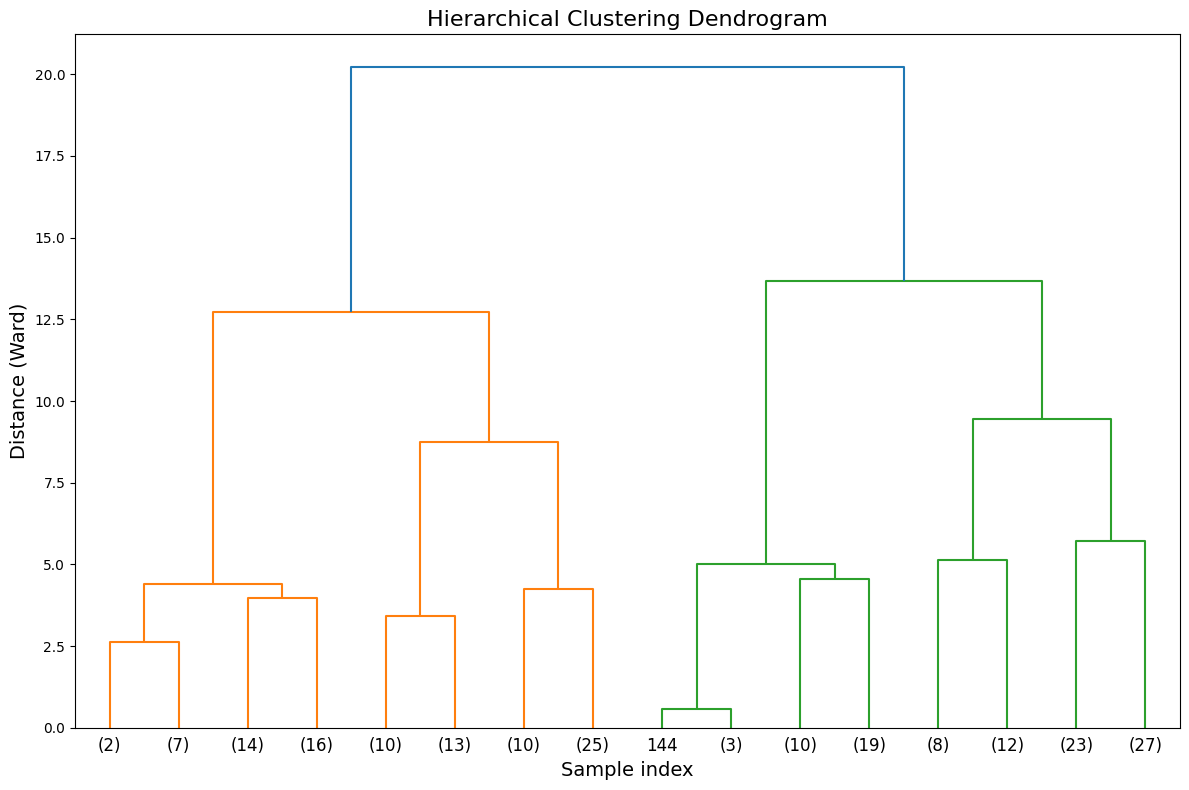

In [ ]:
# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Generate the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3)

# Add labels and title
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Sample index', fontsize=14)
plt.ylabel('Distance (Ward)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#Hierarchical Clustering in Action: Python Implementation & Insights

##Step 1: Creating and Analyzing the Clusters


Cluster Statistics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
1        32.692308           86.538462               82.128205
2        25.931034           45.017241               60.517241
3        41.454545           89.090909               16.181818
4        51.757143           45.514286               39.900000

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
1        0.538462  0.461538
2        0.655172  0.344828
3        0.454545  0.545455
4        0.542857  0.457143


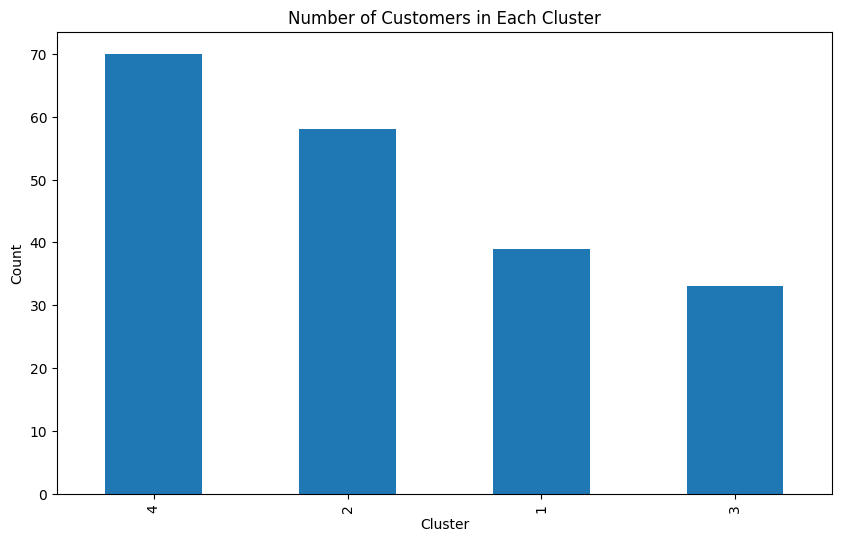

In [ ]:
# Import hierarchical clustering from sklearn
from scipy.cluster.hierarchy import fcluster

# Create clusters based on the dendrogram threshold
num_clusters = 4  # Based on dendrogram analysis
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the original dataframe
data['Cluster'] = clusters

# Analyze the clusters, excluding non-numeric columns
cluster_means = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})
print("\nCluster Statistics:")
print(cluster_means)

# Analyze categorical variables by cluster
print("\nGender Distribution by Cluster:")
gender_distribution = pd.crosstab(data['Cluster'], data['Gender'], normalize='index')
print(gender_distribution)

# Visualize the cluster distribution
plt.figure(figsize=(10, 6))
data['Cluster'].value_counts().plot(kind='bar')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

##Step 2: Visualizing the Clusters in Feature Space

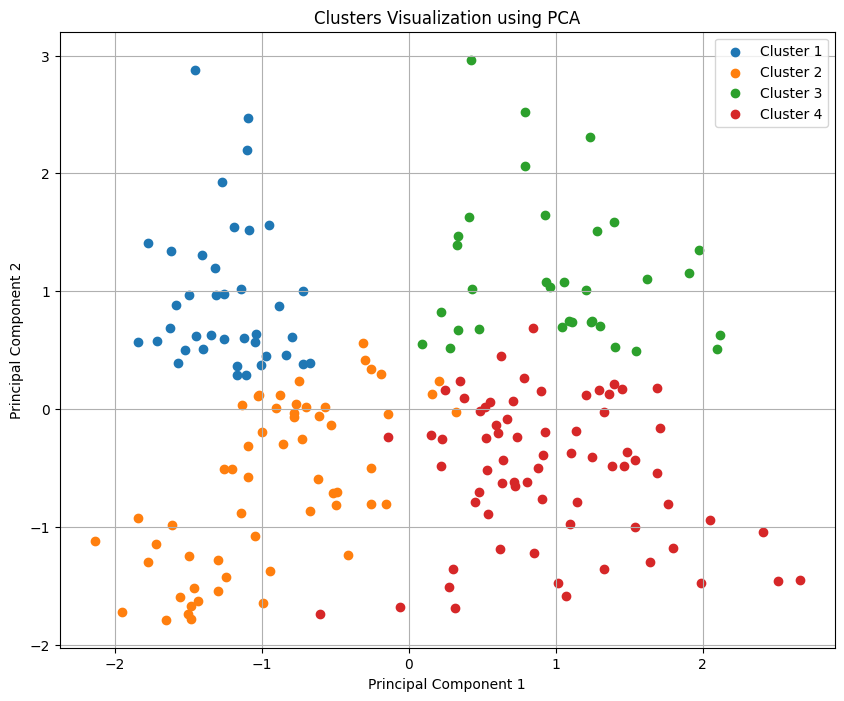

In [ ]:
# Select two features for visualization
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Cluster': clusters
})

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

##Step 3: Comparing Results with K-Means

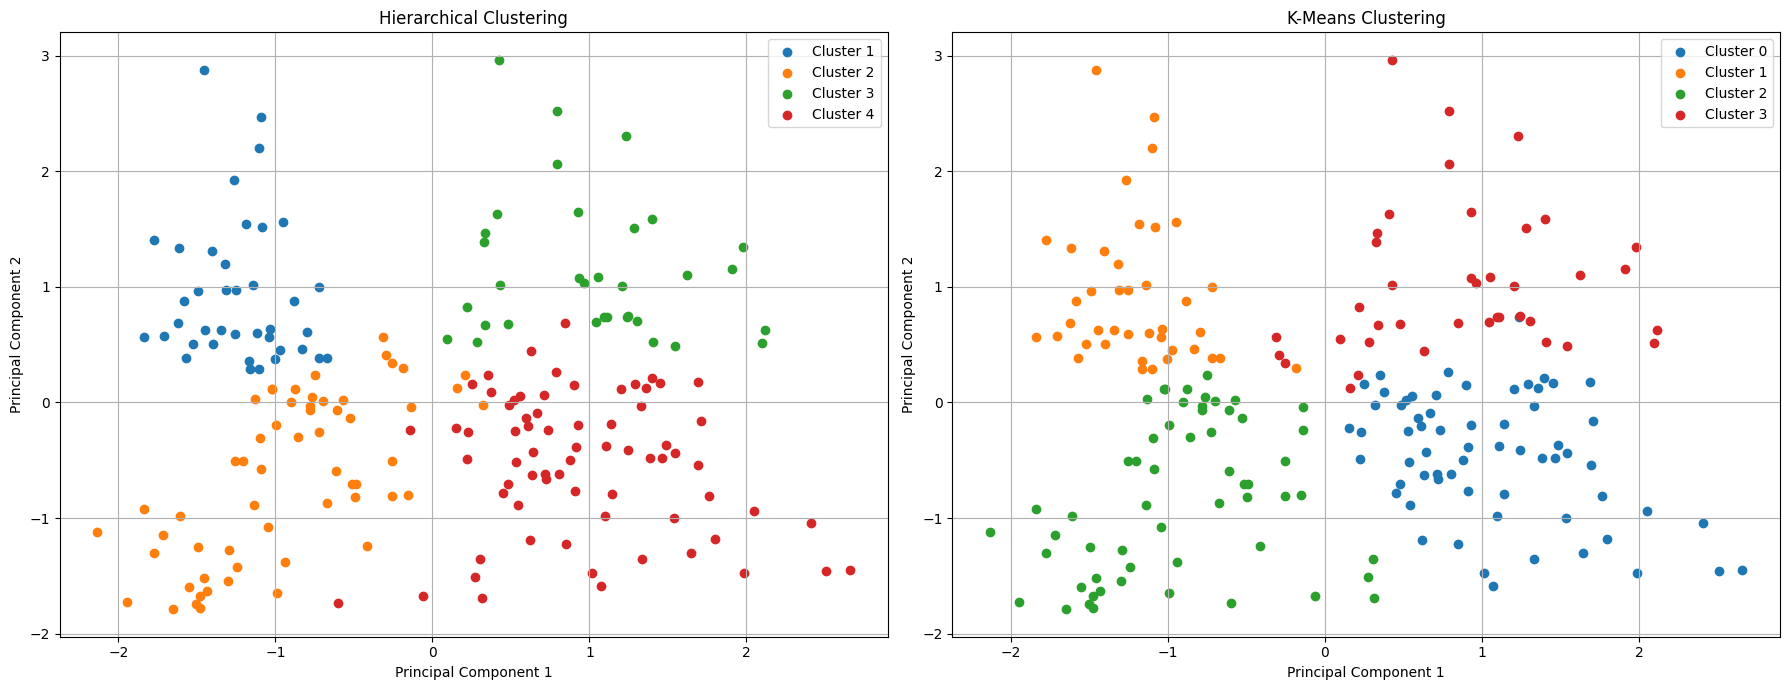

Comparison of cluster assignments:
K-Means        0   1   2   3
Hierarchical                
1              0  39   0   0
2              1   1  51   5
3              1   0   0  32
4             62   0   6   2


In [ ]:
from sklearn.cluster import KMeans # Import KMeans

# Apply K-Means clustering with the same number of clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

# Add K-means cluster labels to the data
data['KMeans_Cluster'] = kmeans_clusters

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1]
})

# Create a figure for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot hierarchical clusters
# First, get hierarchical clusters using fcluster
from scipy.cluster.hierarchy import fcluster
hierarchical_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Plot hierarchical clustering results
for cluster in range(1, num_clusters + 1):
    cluster_points = pca_df[hierarchical_clusters == cluster]
    axes[0].scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

axes[0].set_title('Hierarchical Clustering')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid(True)

# Plot K-means clustering results
for cluster in range(num_clusters):
    cluster_points = pca_df[kmeans_clusters == cluster]
    axes[1].scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}')

axes[1].set_title('K-Means Clustering')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Compare cluster assignments
comparison = pd.crosstab(hierarchical_clusters, kmeans_clusters,
                         rownames=['Hierarchical'], colnames=['K-Means'])
print("Comparison of cluster assignments:")
print(comparison)